# Boosting in python

1. AdaBoost <br>
2. Gradient boosting (GBM) <br>
3. XGBoost


# Boosting in R
https://www.analyticsvidhya.com/blog/2015/09/complete-guide-boosting-methods/


## AdaBoost (Adaptive Boosting)
 It works on similar method as discussed above. It fits a sequence of weak learners on different weighted training data. It starts by predicting original data set and gives equal weight to each observation. If prediction is incorrect using the first learner, then it gives higher weight to observation which have been predicted incorrectly. Being an iterative process, it continues to add learner(s) until a limit is reached in the number of models or accuracy.

Mostly, we use decision stamps with AdaBoost. But, we can use any machine learning algorithms as base learner if it accepts weight on training data set. We can use AdaBoost algorithms for both classification and regression problem.

In [1]:
from sklearn.ensemble import AdaBoostClassifier #For Classification
from sklearn.ensemble import AdaBoostRegressor #For Regression
from sklearn.tree import DecisionTreeClassifier

In [ ]:
#DOnt RUN
dt = DecisionTreeClassifier() 
clf = AdaBoostClassifier(n_estimators=100, base_estimator=dt,learning_rate=1)
#Above I have used decision tree as a base estimator, you can use any ML learner as base estimator if it ac# cepts sample weight 
clf.fit(x_train,y_train)

You can tune the parameters to optimize the performance of algorithms. The key parameters for tuning:

n_estimators: It controls the number of weak learners.
learning_rate:Controls the contribution of weak learners in the final combination. There is a trade-off between learning_rate and n_estimators.
base_estimators: It helps to specify different ML algorithm.
You can also tune the parameters of base learners to optimize its performance.

## Gradient boosing (GBM)


In gradient boosting, it trains many model sequentially. Each new model gradually minimizes the loss function (y = ax + b + e, e needs special attention as it is an error term) of the whole system using Gradient Descent method. The learning procedure consecutively fit new models to provide a more accurate estimate of the response variable.

The principle idea behind this algorithm is to construct new base learners which can be maximally correlated with negative gradient of the loss function, associated with the whole ensemble. 



In [ ]:
#DONT RUN
#quick code
from sklearn.ensemble import GradientBoostingClassifier #For Classification
from sklearn.ensemble import GradientBoostingRegressor #For Regression

clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1)
clf.fit(X_train, y_train)

In [4]:
#Import libraries:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier  #GBM algorithm
from sklearn import cross_validation, metrics   #Additional scklearn functions
from sklearn.grid_search import GridSearchCV   #Perforing grid search

import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4



C:\Users\dave_\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\dave_\Anaconda3\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [5]:
#train = pd.read_csv('train_modified.csv', encoding = "ISO-8859-1")
#target = 'Disbursed'
#IDcol = 'ID'
df = pd.read_csv("diabetes.csv")

In [6]:
df.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [7]:
y='Outcome' #dependent variable

Before proceeding further, lets define a function which will help us create GBM models and perform cross-validation.<br>
<br> The function will do the following: <br>
1. fit the model <br>
2. determine training accuracy<br>
3. determine training AUC<br>
4. determine testing AUC<br>
5. perform CV is performCV is True<br>
6. plot Feature Importance if printFeatureImportance is True<br>

In [8]:
def modelfit(alg, dtrain, predictors, performCV=True, printFeatureImportance=True, cv_folds=5):
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain['Outcome'])
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
    
    #Perform cross-validation:
    if performCV:
        cv_score = cross_validation.cross_val_score(alg, dtrain[predictors], dtrain['Outcome'], 
                                                    cv=cv_folds, scoring='roc_auc')
    
    #Print model report:
    print("\nModel Report")
    print("Accuracy : %.4g" % metrics.accuracy_score(dtrain['Outcome'].values, dtrain_predictions))
    print ("AUC Score (Train): %f" % metrics.roc_auc_score(dtrain['Outcome'], dtrain_predprob))
    
    if performCV:
        print ("CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" %  \
               (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
    
        
    #Print Feature Importance
    if printFeatureImportance:
        feat_imp = pd.Series(alg.feature_importances_, predictors).sort_values(ascending=False)
        feat_imp.plot(kind='bar', title='Feature Importances')
        plt.ylabel('Feature Importance Score')

## Creating Baseline Model
Lets start by creating a baseline model. In this case, the evaluation metric is AUC so using any constant value will give 0.5 as result. Typically, a good baseline can be a GBM model with default parameters, i.e. without any tuning. Lets find out what it gives:


Model Report
Accuracy : 0.9062
AUC Score (Train): 0.971530
CV Score : Mean - 0.8260793 | Std - 0.02835991 | Min - 0.7925 | Max - 0.8771698


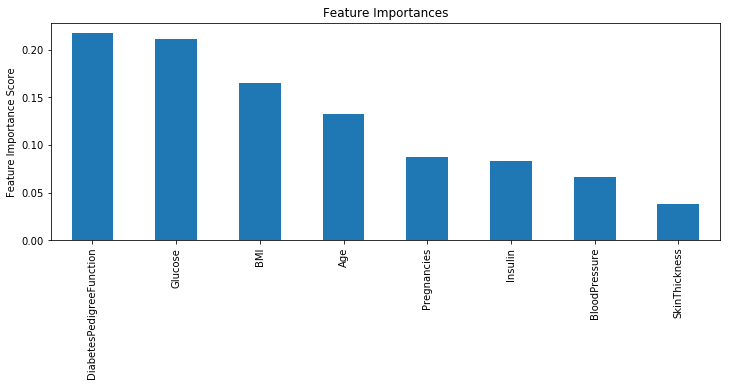

In [9]:
#Choose all predictors except target & IDcols
#predictors = [x for x in train.columns if x not in [target, IDcol]]
predictors = df.columns.values[:8]
gbm0 = GradientBoostingClassifier(random_state=10)
modelfit(gbm0, df, predictors)

So, the mean CV score is 0.8261 and we should expect our model to do better than this
<br>
<b>Parameter tuning : </b><br>
<b>learning_rate</b><br>
This determines the impact of each tree on the final outcome (step 2.4). GBM works by starting with an initial estimate which is updated using the output of each tree. The learning parameter controls the magnitude of this change in the estimates.
Lower values are generally preferred as they make the model robust to the specific characteristics of tree and thus allowing it to generalize well.
Lower values would require higher number of trees to model all the relations and will be computationally expensive.<br>
<b>n_estimators</b><br>
The number of sequential trees to be modeled (step 2)
Though GBM is fairly robust at higher number of trees but it can still overfit at a point. Hence, this should be tuned using CV for a particular learning rate.<br>
<b>subsample</b><br>
The fraction of observations to be selected for each tree. Selection is done by random sampling.
Values slightly less than 1 make the model robust by reducing the variance.
Typical values ~0.8 generally work fine but can be fine-tuned further.<br>
<b>random_state</b><br>
The random number seed so that same random numbers are generated every time.
This is important for parameter tuning. If we don’t fix the random number, then we’ll have different outcomes for subsequent runs on the same parameters and it becomes difficult to compare models.
It can potentially result in overfitting to a particular random sample selected. We can try running models for different random samples, which is computationally expensive and generally not used.

<br>
<br>
<br>
<br><b>General approach to Parameter Tuning</b><br>
Here are two types of parameter to be tuned here – tree based and boosting parameters. There are no optimum values for learning rate as low values always work better, given that we train on sufficient number of trees.

Though, GBM is robust enough to not overfit with increasing trees, but a high number for pa particular learning rate can lead to overfitting. But as we reduce the learning rate and increase trees, the computation becomes expensive and would take a long time to run on standard personal computers.<br>

Keeping all this in mind, we can take the following approach:<br>

1. Choose a relatively high learning rate. Generally the default value of 0.1 works but somewhere between 0.05 to 0.2 should work for different problems <br>
2. Determine the optimum number of trees for this learning rate. This should range around 40-70. Remember to choose a value on which your system can work fairly fast. This is because it will be used for testing various scenarios and determining the tree parameters.<br>
3. Tune tree-specific parameters for decided learning rate and number of trees. Note that we can choose different parameters to define a tree and I’ll take up an example here.<br>
4. Lower the learning rate and increase the estimators proportionally to get more robust models.<br>

<b> Two types of parameters here: </b><br>
<br>
<b>Tree specific parameters</b> <br>
min_samples_split<br>
min_samples_leaf<br>
max_depth<br>
min_leaf_nodes<br>
max_features<br>
loss function <br>

<b>Boosting specific parameters</b> <br>
n_estimators<br>
learning_rate<br>
subsample<br>

## Step 1- Find the number of estimators for a high learning rate

We will use the following benchmarks for parameters:

min_samples_split = 100 : ~0.5-1% of total values. Since this is imbalanced class problem, we'll take small value
min_samples_leaf = 50 : Just using for preventing overfitting. will be tuned later.
max_depth = 8 : since high number of observations and predictors, choose relatively high value
max_features = 'sqrt' : general thumbrule to start with
subsample = 0.8 : typically used value (will be tuned later)
0.1 is assumed to be a good learning rate to start with. Let's try to find the optimum number of estimators requried for this.

In [10]:
#choose predictors apart from last column "Outcome"
predictors = df.columns.values[:8]
param_test1 = {'n_estimators':list(range(20,101,10))}
gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, min_samples_split=100,
                                  min_samples_leaf=50,max_depth=8,max_features='sqrt', subsample=0.8,random_state=10), 
                       param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch1.fit(df[predictors],df['Outcome'])

GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=8,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=50,
              min_samples_split=100, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=10,
              subsample=0.8, verbose=0, warm_start=False),
       fit_params={}, iid=False, n_jobs=4,
       param_grid={'n_estimators': [20, 30, 40, 50, 60, 70, 80, 90, 100]},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=0)

In [11]:
#output can be checked with the below.
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

([mean: 0.82296, std: 0.04287, params: {'n_estimators': 20},
  mean: 0.82758, std: 0.03932, params: {'n_estimators': 30},
  mean: 0.82916, std: 0.03693, params: {'n_estimators': 40},
  mean: 0.82638, std: 0.03864, params: {'n_estimators': 50},
  mean: 0.82932, std: 0.03696, params: {'n_estimators': 60},
  mean: 0.82791, std: 0.03681, params: {'n_estimators': 70},
  mean: 0.82817, std: 0.03693, params: {'n_estimators': 80},
  mean: 0.82440, std: 0.03585, params: {'n_estimators': 90},
  mean: 0.82400, std: 0.03373, params: {'n_estimators': 100}],
 {'n_estimators': 60},
 0.8293172606568833)


Model Report
Accuracy : 0.8477
AUC Score (Train): 0.921291
CV Score : Mean - 0.8293173 | Std - 0.03695592 | Min - 0.7783333 | Max - 0.8862264


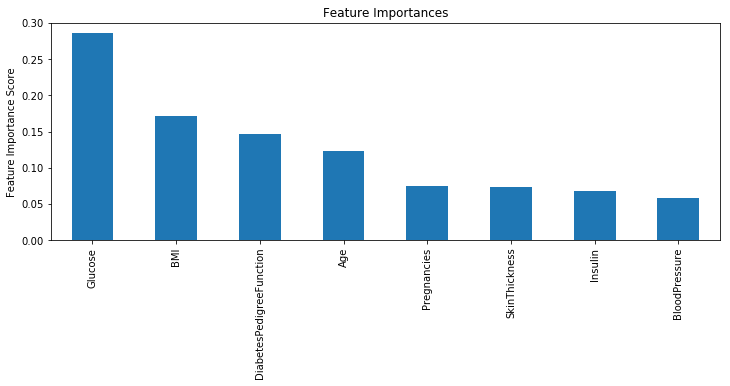

In [24]:
modelfit(gsearch1.best_estimator_, df, predictors)

So we got 60 as the optimal estimators for the 0.1 learning rate. Note that 60 is a reasonable value and can be used as it is. But it might not be the same in all cases. Other situations:

If the value is around 20, you might want to try lowering the learning rate to 0.05 and re-run grid search
If the values are too high ~100, tuning the other parameters will take long time and you can try a higher learning rate


## Step 2 Tune tree-specific parameters
Will do this in 2 stages <br>
1. Tune max_depth and num_samples_split <br>
2. Tune min_samples_leaf <br>
3. Tune max_features <br>

In [13]:
#Grid seach on subsample and max_features
param_test2 = {'max_depth':list(range(5,16,1)), 'min_samples_split':list(range(100,1001,100))}
gsearch2 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=60,
                                                max_features='sqrt', subsample=0.8, random_state=10), 
                       param_grid = param_test2, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch2.fit(df[predictors],df['Outcome'])

GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=60, presort='auto', random_state=10,
              subsample=0.8, verbose=0, warm_start=False),
       fit_params={}, iid=False, n_jobs=4,
       param_grid={'max_depth': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], 'min_samples_split': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=0)

In [14]:
gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_

([mean: 0.83549, std: 0.03148, params: {'max_depth': 5, 'min_samples_split': 100},
  mean: 0.84037, std: 0.03449, params: {'max_depth': 5, 'min_samples_split': 200},
  mean: 0.83773, std: 0.03658, params: {'max_depth': 5, 'min_samples_split': 300},
  mean: 0.83295, std: 0.03663, params: {'max_depth': 5, 'min_samples_split': 400},
  mean: 0.50000, std: 0.00000, params: {'max_depth': 5, 'min_samples_split': 500},
  mean: 0.50000, std: 0.00000, params: {'max_depth': 5, 'min_samples_split': 600},
  mean: 0.50000, std: 0.00000, params: {'max_depth': 5, 'min_samples_split': 700},
  mean: 0.50000, std: 0.00000, params: {'max_depth': 5, 'min_samples_split': 800},
  mean: 0.50000, std: 0.00000, params: {'max_depth': 5, 'min_samples_split': 900},
  mean: 0.50000, std: 0.00000, params: {'max_depth': 5, 'min_samples_split': 1000},
  mean: 0.83669, std: 0.03128, params: {'max_depth': 6, 'min_samples_split': 100},
  mean: 0.84001, std: 0.03361, params: {'max_depth': 6, 'min_samples_split': 200},
  m


Model Report
Accuracy : 0.849
AUC Score (Train): 0.928799
CV Score : Mean - 0.841283 | Std - 0.0335188 | Min - 0.7933333 | Max - 0.8962264


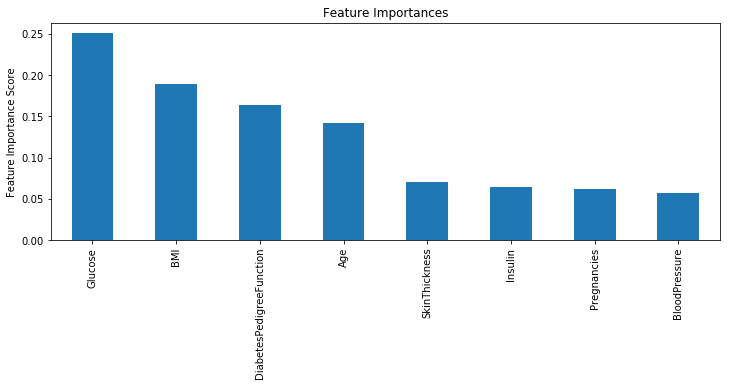

In [16]:
modelfit(gsearch2.best_estimator_, df, predictors)

Tune max_features

In [29]:
#Grid seach on max_features
param_test3 = {'max_features':list(range(1,9,1))}
gsearch3 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=60,max_depth=7, 
                            min_samples_split=200, min_samples_leaf=60, subsample=0.8, random_state=10),
                       param_grid = param_test3, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch3.fit(df[predictors],df['Outcome'])

GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=7,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=60,
              min_samples_split=200, min_weight_fraction_leaf=0.0,
              n_estimators=60, presort='auto', random_state=10,
              subsample=0.8, verbose=0, warm_start=False),
       fit_params={}, iid=False, n_jobs=4,
       param_grid={'max_features': [1, 2, 3, 4, 5, 6, 7, 8]},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=0)

In [30]:
gsearch3.grid_scores_, gsearch3.best_params_, gsearch3.best_score_

([mean: 0.82577, std: 0.02949, params: {'max_features': 1},
  mean: 0.83026, std: 0.03418, params: {'max_features': 2},
  mean: 0.83694, std: 0.03290, params: {'max_features': 3},
  mean: 0.83242, std: 0.03258, params: {'max_features': 4},
  mean: 0.83769, std: 0.03520, params: {'max_features': 5},
  mean: 0.83579, std: 0.03127, params: {'max_features': 6},
  mean: 0.83246, std: 0.03220, params: {'max_features': 7},
  mean: 0.83413, std: 0.03078, params: {'max_features': 8}],
 {'max_features': 5},
 0.8376911250873516)


Model Report
Accuracy : 0.8255
AUC Score (Train): 0.904127
CV Score : Mean - 0.8376911 | Std - 0.03520068 | Min - 0.7909259 | Max - 0.8932075


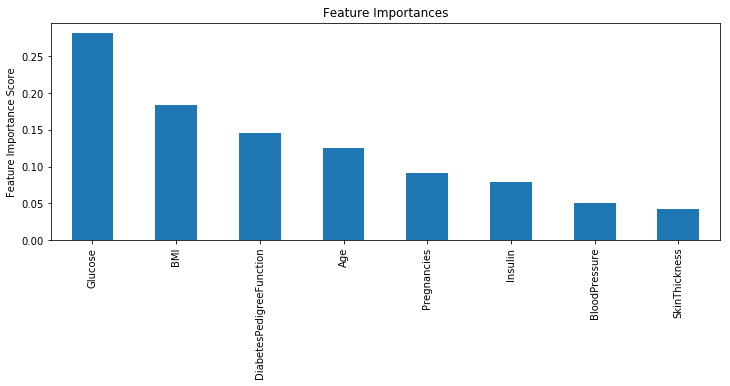

In [27]:
modelfit(gsearch3.best_estimator_, df, predictors)

## Step 3 Tune Subsample and Lower Learning Rate

In [32]:
#Grid seach on subsample and max_features
param_test4 = {'subsample':[0.6,0.7,0.75,0.8,0.85,0.9]}
gsearch4 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=60,max_depth=7, 
                            min_samples_split=200, min_samples_leaf=60, subsample=0.8, random_state=10, max_features=5),
                       param_grid = param_test4, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch4.fit(df[predictors],df['Outcome'])

GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=7,
              max_features=5, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=60,
              min_samples_split=200, min_weight_fraction_leaf=0.0,
              n_estimators=60, presort='auto', random_state=10,
              subsample=0.8, verbose=0, warm_start=False),
       fit_params={}, iid=False, n_jobs=4,
       param_grid={'subsample': [0.6, 0.7, 0.75, 0.8, 0.85, 0.9]},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=0)

In [33]:
gsearch4.grid_scores_, gsearch4.best_params_, gsearch4.best_score_

([mean: 0.83641, std: 0.03631, params: {'subsample': 0.6},
  mean: 0.83228, std: 0.03617, params: {'subsample': 0.7},
  mean: 0.83269, std: 0.03281, params: {'subsample': 0.75},
  mean: 0.83769, std: 0.03520, params: {'subsample': 0.8},
  mean: 0.83516, std: 0.03324, params: {'subsample': 0.85},
  mean: 0.83406, std: 0.03377, params: {'subsample': 0.9}],
 {'subsample': 0.8},
 0.8376911250873516)


Model Report
Accuracy : 0.8255
AUC Score (Train): 0.904127
CV Score : Mean - 0.8376911 | Std - 0.03520068 | Min - 0.7909259 | Max - 0.8932075


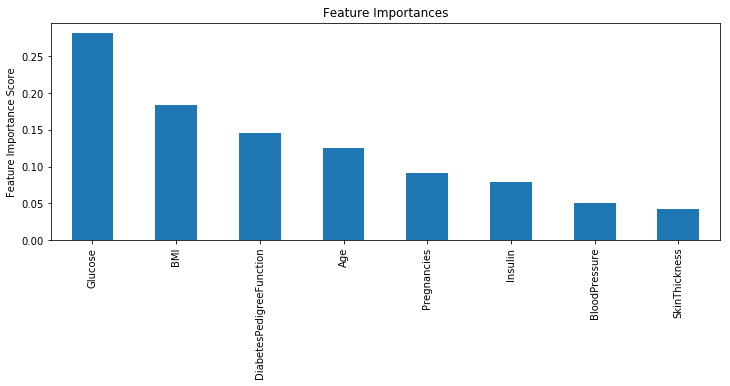

In [34]:
modelfit(gsearch4.best_estimator_, df, predictors)

With all tuned lets try reducing the learning rate and proportionally increasing the number of estimators to get more robust results:


Model Report
Accuracy : 0.8294
AUC Score (Train): 0.903549
CV Score : Mean - 0.8377547 | Std - 0.03496334 | Min - 0.7874074 | Max - 0.8909434


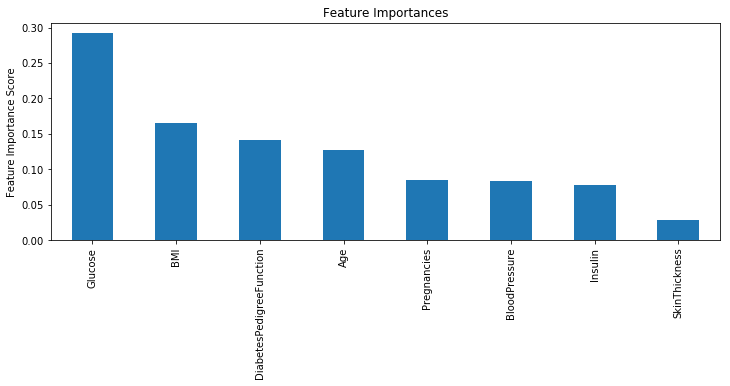

In [36]:
predictors = df.columns.values[:8]
gbm_tuned_1 = GradientBoostingClassifier(learning_rate=0.05, n_estimators=120,max_depth=7, min_samples_split=200, 
                                         min_samples_leaf=60, subsample=0.8, random_state=10, max_features=5)



modelfit(gbm_tuned_1, df, predictors)


1/10th learning rate


Model Report
Accuracy : 0.8268
AUC Score (Train): 0.905060
CV Score : Mean - 0.8359511 | Std - 0.0339955 | Min - 0.7874074 | Max - 0.890566


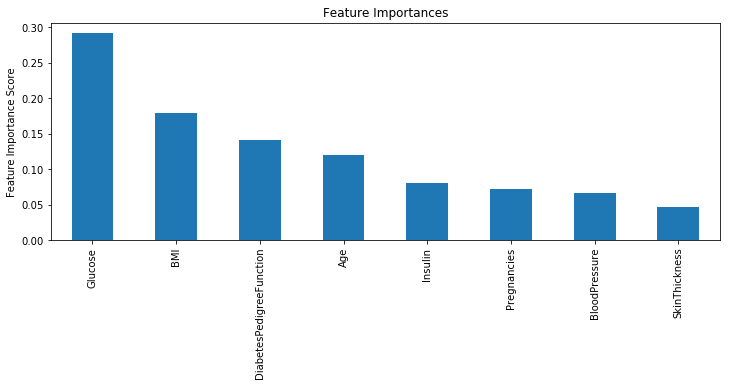

In [37]:
predictors = df.columns.values[:8]
gbm_tuned_2 = GradientBoostingClassifier(learning_rate=0.01, n_estimators=600,max_depth=7, min_samples_split=200, 
                                         min_samples_leaf=60, subsample=0.8, random_state=10, max_features=5)



modelfit(gbm_tuned_2, df, predictors)

1/50th learning rate


Model Report
Accuracy : 0.8294
AUC Score (Train): 0.904993
CV Score : Mean - 0.8373592 | Std - 0.0327241 | Min - 0.7914815 | Max - 0.8903774


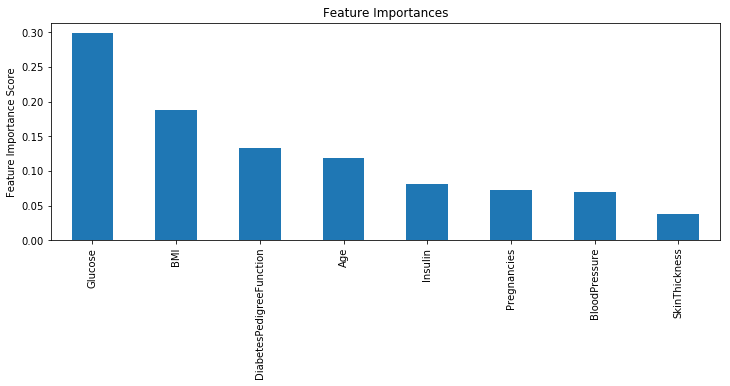

In [38]:
predictors = df.columns.values[:8]
gbm_tuned_3 = GradientBoostingClassifier(learning_rate=0.005, n_estimators=1200,max_depth=7, min_samples_split=200, 
                                         min_samples_leaf=60, subsample=0.8, random_state=10, max_features=5)



modelfit(gbm_tuned_3, df, predictors)


Model Report
Accuracy : 0.8359
AUC Score (Train): 0.912619
CV Score : Mean - 0.8346366 | Std - 0.03242562 | Min - 0.7892593 | Max - 0.8864151


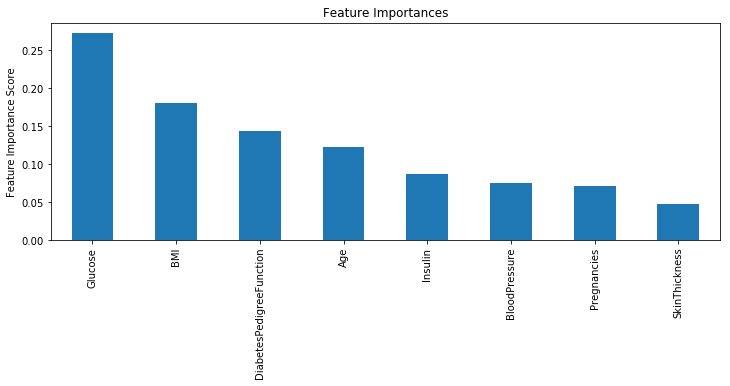

In [39]:
predictors = df.columns.values[:8]
gbm_tuned_4 = GradientBoostingClassifier(learning_rate=0.005, n_estimators=1500,max_depth=7, min_samples_split=200, 
                                         min_samples_leaf=60, subsample=0.8, random_state=10, max_features=5)



modelfit(gbm_tuned_4, df, predictors)


Model Report
Accuracy : 1
AUC Score (Train): 1.000000
CV Score : Mean - 0.80929 | Std - 0.03716774 | Min - 0.7633333 | Max - 0.8764151


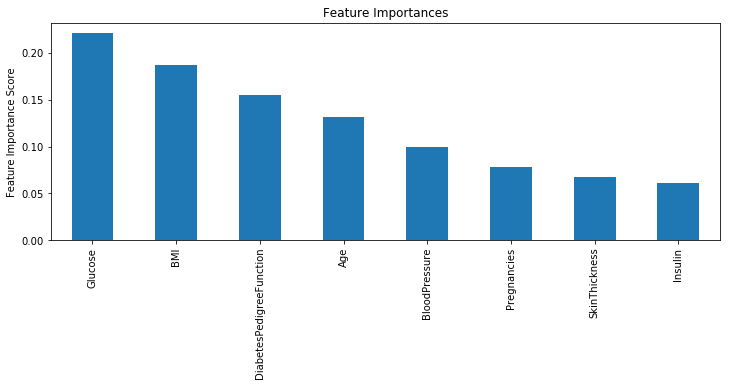

In [55]:
#Please note that all the above are just initial estimates and will be tuned later
#so we can do a lot better with tuning

predictors = df.columns.values[:8]
gbm01 = GradientBoostingClassifier(learning_rate=0.1,
                                   n_estimators=60,
                                   max_depth=9,
                                   subsample=0.8,
                                   random_state=10)
modelfit(gbm01, df, predictors)



In [56]:
import pandas as pd
import numpy as np

# Bagged Decision Trees for Classification
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn import metrics

from sklearn.model_selection import train_test_split


In [58]:
#build a quick logistic regression model and check the accuracy

X = df.iloc[:,:8] # independent variables
y = df['Outcome'] # dependent variables

In [59]:
#Normalize
X = preprocessing.StandardScaler().fit_transform(X)

In [60]:
# evaluate the model by splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)

In [61]:
import sklearn.cross_validation as cross_validation
kfold = cross_validation.StratifiedKFold(y = y_train, n_folds=5, random_state=2017)

In [62]:
num_trees = 100
# Dection Tree with 5 fold cross validation
# lets restrict max_depth to 3 to have more impure leaves
clf_DT = DecisionTreeClassifier(max_depth=1, random_state=2017).fit(X_train,y_train)
results = cross_validation.cross_val_score(clf_DT, X_train,y_train,cv=kfold)
print ("Decision Tree (stand alone) - Train : ", results.mean())
print ("Decision Tree (stand alone) - Test : ", metrics.accuracy_score(clf_DT.predict(X_test), y_test))

Decision Tree (stand alone) - Train :  0.698752327026
Decision Tree (stand alone) - Test :  0.720779220779


## Comparison with decision tree (stand alone) and AdaBoost 

In [63]:
# Using Adaptive Boosting of 100 iteration
clf_DT_Boost = AdaBoostClassifier(base_estimator=clf_DT, n_estimators=num_trees, 
                                  learning_rate=0.1, random_state=2017).fit(X_train,y_train)
results = cross_validation.cross_val_score(clf_DT_Boost, X_train, y_train,
cv=kfold)
print ("Decision Tree (AdaBoosting) - Train : ", results.mean())
print ("Decision Tree (AdaBoosting) - Test : ", metrics.accuracy_score(clf_DT_Boost.predict(X_test), y_test))

Decision Tree (AdaBoosting) - Train :  0.755730181046
Decision Tree (AdaBoosting) - Test :  0.798701298701






## Boosting Algorithm: AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier #For Classification
from sklearn.ensemble import AdaBoostRegressor #For Regression
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier() 
clf = AdaBoostClassifier(n_estimators=100, base_estimator=dt,learning_rate=1)
#Above I have used decision tree as a base estimator, you can use any ML learner as base estimator if it ac# cepts sample weight 
clf.fit(x_train,y_train)

You can tune the parameters to optimize the performance of algorithms, I’ve mentioned below the key parameters for tuning:

n_estimators: It controls the number of weak learners.
learning_rate:Controls the contribution of weak learners in the final combination. There is a trade-off between learning_rate and n_estimators.
base_estimators: It helps to specify different ML algorithm.
You can also tune the parameters of base learners to optimize its performance.